<a href="https://colab.research.google.com/github/innocentgodson/KNN-Customer-segmentation-model---Classification/blob/main/KNN%20Customer_segmentation_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**K-Nearest Neighbors**

*   Use K Nearest neighbors to classify data

In this Lab you will load a customer dataset, fit the data, and use K-Nearest Neighbors to predict a data point.

What is **K-Nearest Neighbors**?

**K-Nearest Neighbors** is a supervised learning algorithm. Where the data is 'trained' with data points corresponding to their classification. To predict the class of a given data point, it takes into account the classes of the 'K' nearest data points and chooses the class in which the majority of the 'K' nearest data points belong to as the predicted class.

**About the dataset**

Imagine a telecommunications provider has segmented its customer base by service usage patterns, categorizing the customers into four groups. If demographic data can be used to predict group membership, the company can customize offers for individual prospective customers. It is a classification problem. That is, given the dataset, with predefined labels, we need to build a model to be used to predict class of a new or unknown case.

The example focuses on using demographic data, such as region, age, and marital status, to predict usage patterns.

The target field, called custcat, has four possible values that correspond to the four customer groups, as follows: 1- Basic Service 2- E-Service 3- Plus Service 4- Total Service

Our objective is to build a classifier, to predict the class of unknown cases. We will use a specific type of classification called K nearest neighbour.

**Step -1 Import libraries**

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


**Step 2 - Load and read in the data**

In [26]:
path="/content/drive/MyDrive/BellsDataset/Telecoms dataset/teleCust1000t.csv"

df=pd.read_csv(path)

df.head(10)

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3
5,2,41,39,0,17,78.0,2,16,0.0,1,1,3
6,3,45,22,1,2,19.0,2,4,0.0,1,5,2
7,2,38,35,0,5,76.0,2,10,0.0,0,3,4
8,3,45,59,1,7,166.0,4,31,0.0,0,5,3
9,1,68,41,1,21,72.0,1,22,0.0,0,3,2


**Data Visualization and Analysis**

Let’s see how many of each class is in our data set

In [27]:
df['custcat'].value_counts()

,count
custcat,
3,281
1,266
4,236
2,217


**You can easily explore your data using visualization techniques:**

**We can plot each of these features:**

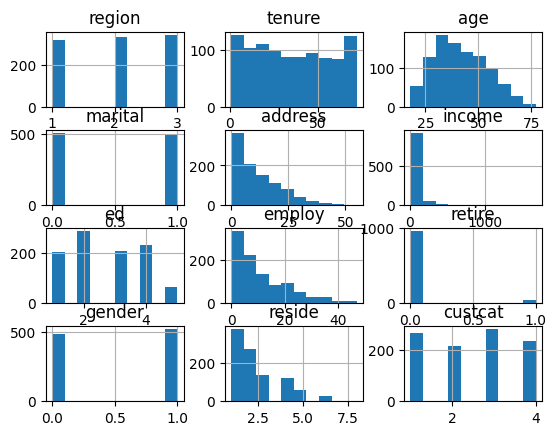

In [28]:
viz = df[['region', 'tenure',	'age', 'marital',	'address',	'income',	'ed',	'employ',	'retire',	'gender',	'reside', 'custcat']]
viz.hist()
plt.show()

**Feature set**

Let's define feature sets, X:

In [29]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

To use scikit-learn library, we have to convert the Pandas data frame to a Numpy array:

**Step 3a - Define Features**

In [30]:
X = df.drop('custcat', axis=1)

In [31]:
X.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside
0,2,13,44,1,9,64.0,4,5,0.0,0,2
1,3,11,33,1,7,136.0,5,5,0.0,0,6
2,3,68,52,1,24,116.0,1,29,0.0,1,2
3,2,33,33,0,12,33.0,2,0,0.0,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4


**Step 3b - Define Target**

In [32]:
y = df['custcat']

In [33]:
y.head()

,custcat
0,1
1,4
2,3
3,1
4,3


**Step 4 - Train/Test Split**

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


**Inspect and verify that your test features and test labels are correctly aligned row-by-row.**

In [35]:
pd.concat([X_test.head(), y_test.head()], axis=1)

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
521,1,48,41,0,21,43.0,2,7,0.0,0,1,2
737,1,15,38,1,11,46.0,5,11,0.0,0,3,1
740,3,34,29,0,5,26.0,3,4,0.0,1,2,2
660,2,45,54,0,25,171.0,3,33,0.0,1,1,3
411,3,5,31,0,1,21.0,3,1,0.0,1,2,1


**Best Practice - Rename the target column for clarity:**

In [36]:
pd.concat([X_test.head(10), y_test.rename('Actual').head(10)], axis=1)

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,Actual
521,1,48,41,0,21,43.0,2,7,0.0,0,1,2
737,1,15,38,1,11,46.0,5,11,0.0,0,3,1
740,3,34,29,0,5,26.0,3,4,0.0,1,2,2
660,2,45,54,0,25,171.0,3,33,0.0,1,1,3
411,3,5,31,0,1,21.0,3,1,0.0,1,2,1
678,1,19,27,1,3,35.0,2,4,0.0,0,6,4
626,2,16,27,0,5,41.0,4,2,0.0,1,1,4
513,1,38,40,0,15,34.0,2,11,0.0,1,1,2
859,3,7,31,1,12,31.0,2,7,0.0,1,6,1
136,2,40,38,0,17,96.0,4,0,0.0,1,1,1


**Quick index alignment check (MOST IMPORTANT)**

In [37]:
X_test.index.equals(y_test.index) # True = perfectly aligned , False = index mismatch (serious issue)

True

**Find mismatched indices explicitly**

In [38]:
X_test.index.difference(y_test.index) # If this returns anything other than an empty Index, you have a problem.

Index([], dtype='int64')

**Step 5 - Feature Scaling** - Data Standardization

In [39]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled)

[[-0.0076287  -1.0556246  -0.69241001 ... -0.20742414  0.98757716
  -0.2497985 ]
 [ 1.21296321 -0.20521933 -0.61085406 ... -0.20742414  0.98757716
   1.14280639]
 [-1.22822061  1.7318149   2.73293988 ...  4.82103975  0.98757716
  -0.94610095]
 ...
 [ 1.21296321 -0.72491144 -0.12151837 ... -0.20742414  0.98757716
  -0.94610095]
 [ 1.21296321  0.45620699 -0.93707786 ... -0.20742414 -1.01257911
   1.14280639]
 [-0.0076287  -1.10286934 -1.42641356 ... -0.20742414 -1.01257911
  -0.94610095]]


**When scaling is NOT needed**

**You do not need standardization for:**

*   Decision Trees
*   Random Forest
*   Gradient Boosting

**You DO need it for:**

*   KNN
*   SVM
*   Logistic Regression
*   Linear Regression
*   Neural Networks












**Step 6 - Train the KNN model**

In [40]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric='euclidean')

**Step 7 - Make predictions**

We can use the model to make predictions on the test set:

In [41]:
y_pred = knn.predict(X_test_scaled)

**Printing the predicted output**

In [42]:
print(y_pred[:5])

[2 2 3 3 3]


**Comparing the actual vs predicted output**

In [43]:
comparison = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

comparison.head(10)

,Actual,Predicted
521,2,2
737,1,2
740,2,3
660,3,3
411,1,3
678,4,3
626,4,4
513,2,3
859,1,1
136,1,4


**Detect misalignment after predictions**

In [44]:
y_pred = pd.Series(y_pred, index=y_test.index, name='Predicted')

**Then check:**

In [45]:
y_test.index.equals(y_pred.index)

True

**Step 8 - Evaluate the knn model**

**8a. Classification report**

In [46]:
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

           1       0.38      0.50      0.43        60
           2       0.23      0.26      0.24        39
           3       0.35      0.33      0.34        55
           4       0.33      0.20      0.25        46

    accuracy                           0.34       200
   macro avg       0.32      0.32      0.32       200
weighted avg       0.33      0.34      0.33       200



**8b. Confusion Matrix**

In [47]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[30 11 14  5]
 [13 10  9  7]
 [18 13 18  6]
 [17  9 11  9]]
